In [3]:
import os
import pandas as pd
import sqlalchemy as sql
import numpy as np

!pip install pymysql
import pymysql
pymysql.install_as_MySQLdb()

!pip install mysql-connector-python
import mysql.connector

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [4]:
df_prices = pd.read_csv('BitCoin.csv')  
df_prices

,date,weighted,close,high,low,open,volume
0,12/23/2019 21:12,6603.36,6554.79,6716.02,6491.60,6604.63,4.640451e+07
1,12/24/2019 21:12,6488.14,6488.91,6563.91,6426.00,6554.79,4.543974e+07
2,12/25/2019 21:12,6539.37,6491.64,6694.79,6452.08,6488.91,3.470634e+07
3,12/26/2019 21:12,6463.00,6490.83,6523.22,6356.73,6491.64,4.582898e+07
4,12/27/2019 21:12,6541.42,6541.00,6574.91,6483.53,6490.83,2.492812e+07
...,...,...,...,...,...,...,...
361,12/18/2020 21:12,19193.44,19400.32,19625.93,18619.69,18865.58,2.635651e+08
362,12/19/2020 21:12,19265.95,19201.67,19757.23,18811.92,19400.32,2.279110e+08
363,12/20/2020 21:12,18854.76,18593.60,19735.32,18129.03,19201.67,4.193062e+08
364,12/21/2020 21:12,18952.65,19531.25,19540.17,18350.14,18593.60,2.697469e+08


In [5]:
pd.options.display.float_format = '{:.1f}'.format

In [6]:
df_prices = df_prices.set_index(['date'])

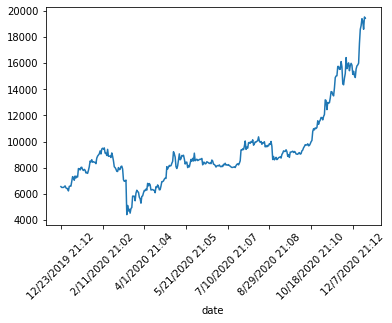

In [7]:
# Como vario el precio a lo largo de la historia?
df_prices['close'].plot()
plt.xticks(rotation='45')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [8]:
df_prices['var_day'] = df_prices['high'] - df_prices['low']

In [9]:
df_prices['var_day']

date
12/23/2019 21:12    224.4
12/24/2019 21:12    137.9
12/25/2019 21:12    242.7
12/26/2019 21:12    166.5
12/27/2019 21:12     91.4
                    ...  
12/18/2020 21:12   1006.2
12/19/2020 21:12    945.3
12/20/2020 21:12   1606.3
12/21/2020 21:12   1190.0
12/22/2020 21:12   1052.4
Name: var_day, Length: 366, dtype: float64

In [10]:
df_prices['var_day'].describe()

count    366.0
mean     421.2
std      349.7
min       64.0
25%      197.6
50%      320.3
75%      533.5
max     2838.1
Name: var_day, dtype: float64

In [11]:
df_prices['var_day/val_tot'] = (df_prices['var_day'] / df_prices['open'])*100

In [12]:
# Varia en proemdio un 4,6% diario. (Analisis intra dia)
df_prices['var_day/val_tot'].describe()

count   366.0
mean      4.6
std       4.2
min       0.8
25%       2.4
50%       3.6
75%       5.5
max      42.5
Name: var_day/val_tot, dtype: float64

In [13]:
# Cuanto mas puede llegar a valer en diciembre del 2021?

def estimate_b0_b1(x, y):
    n = np.size(x)
    #obtenemos los promedios de X y de Y
    m_x, m_y = np.mean(x), np.mean(y)

    #Calcular sumatoria de XY y mi sumatoria de XX
    Sumatoria_xy = np.sum((x-m_x)*(y-m_y))
    Sumatoria_xx = np.sum(x*(x-m_x))

    #coeficientes de regresion
    b_1 = Sumatoria_xy / Sumatoria_xx
    b_0 = m_y - b_1*m_x

    return(b_0, b_1)

def plot_regression(x, y, b):
    plt.scatter(x, y, color = "g", marker = "o", s=30)

    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "b")

    #etiquetado
    plt.xlabel('x-Independiente')
    plt.ylabel('y-Dependiente')

    plt.show()

Los valores b0 = 5551.218924971337, b1 =20.590062331918418


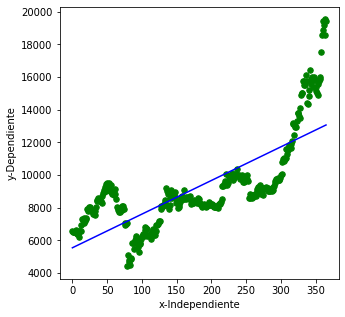

In [14]:
df_prices = df_prices.reset_index()
df_prices_ids = df_prices.index.to_numpy()
df_prices_close = df_prices['close'].to_numpy()

def main():
    #DATASET
    x = df_prices_ids
    y = df_prices_close

    #Obtenemos b1 y b2
    b = estimate_b0_b1(x, y)
    print("Los valores b0 = {}, b1 ={}".format(b[0], b[1]))

    #Graficamos nuestra linea de regresion
    plot_regression(x, y, b)

if __name__== "__main__":
    main()

In [15]:
# Predigo el valor del ano que viene
5551.218924971337 + 20.590062331918418*365*2

20581.96442727178

In [16]:
# Cual es la ganancia estimada?
(((5551.218924971337 + 20.590062331918418*365*2) - (5551.218924971337 + 20.590062331918418*365)) / (5551.218924971337 + 20.590062331918418*365*2))*100

36.51436080217933

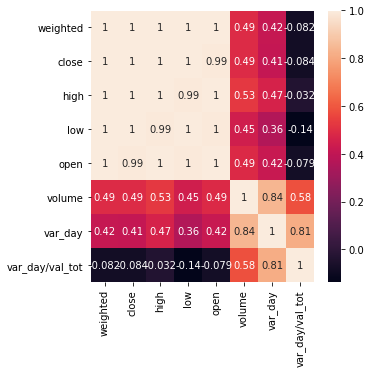

In [17]:
sns.heatmap(df_prices.corr(), annot= True)

In [18]:
df_prices.corr(method ='pearson') 


,weighted,close,high,low,open,volume,var_day,var_day/val_tot
weighted,1.0,1.0,1.0,1.0,1.0,0.5,0.4,-0.1
close,1.0,1.0,1.0,1.0,1.0,0.5,0.4,-0.1
high,1.0,1.0,1.0,1.0,1.0,0.5,0.5,-0.0
low,1.0,1.0,1.0,1.0,1.0,0.4,0.4,-0.1
open,1.0,1.0,1.0,1.0,1.0,0.5,0.4,-0.1
volume,0.5,0.5,0.5,0.4,0.5,1.0,0.8,0.6
var_day,0.4,0.4,0.5,0.4,0.4,0.8,1.0,0.8
var_day/val_tot,-0.1,-0.1,-0.0,-0.1,-0.1,0.6,0.8,1.0


In [19]:
#Existe una relacion directa entre el volumen de movimiento del mercado la variacion del precio.
0.84 


0.84

In [20]:
# Como se manejo el volumen de mercado en el tiempo?
df_prices = df_prices.set_index(['date'])

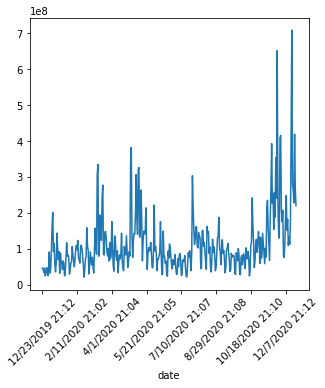

In [21]:
df_prices['volume'].plot()
plt.xticks(rotation='45')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

Los valores b0 = 65631649.10863969, b1 =253589.01192855564


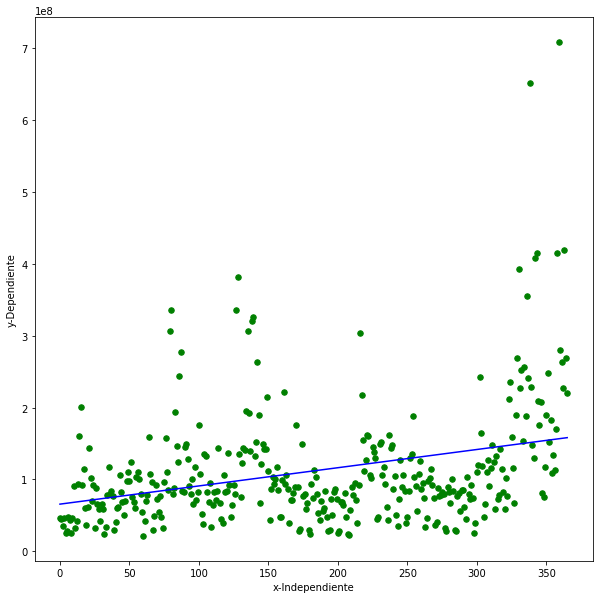

In [22]:
df_prices = df_prices.reset_index()
df_prices_ids = df_prices.index.to_numpy()
df_prices_close = df_prices['volume'].to_numpy()

if __name__== "__main__":
    main()

In [35]:
# Conociendo apertura cierre, cual es mi ganancia estimada que contemple el error std promedio.
df_prices['var_std'] = ((( df_prices['close'] - df_prices['open'] ) / df_prices['open'])*100 ) + 36.51436080217933

In [36]:
df_prices.head(100)

,date,weighted,close,high,low,open,volume,var_day,var_day/val_tot,var_std
0,12/23/2019 21:12,6603.4,6554.8,6716.0,6491.6,6604.6,46404506.6,224.4,3.4,35.8
1,12/24/2019 21:12,6488.1,6488.9,6563.9,6426.0,6554.8,45439743.6,137.9,2.1,35.5
2,12/25/2019 21:12,6539.4,6491.6,6694.8,6452.1,6488.9,34706342.2,242.7,3.7,36.6
3,12/26/2019 21:12,6463.0,6490.8,6523.2,6356.7,6491.6,45828981.8,166.5,2.6,36.5
4,12/27/2019 21:12,6541.4,6541.0,6574.9,6483.5,6490.8,24928117.2,91.4,1.4,37.3
...,...,...,...,...,...,...,...,...,...,...
95,3/27/2020 21:03,5604.7,5628.1,5746.3,5431.5,5746.3,100566392.6,314.8,5.5,34.5
96,3/28/2020 21:03,5453.0,5286.8,5649.2,5284.2,5628.1,65879604.8,365.1,6.5,30.4
97,3/29/2020 21:03,5731.8,5808.6,5990.2,5276.1,5286.8,117802191.8,714.0,13.5,46.4
98,3/30/2020 21:03,5895.3,5837.5,6074.0,5802.2,5808.6,72008998.2,271.7,4.7,37.0


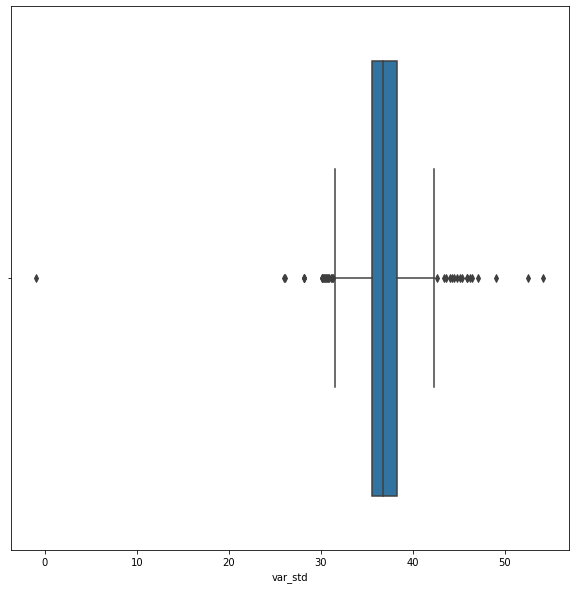

In [37]:
#Con variacion de ganancia.
ax = sns.boxplot(x=df_prices['var_std'])

In [38]:
df_prices['var_std'].describe()

count   366.0
mean     36.9
std       3.9
min      -1.0
25%      35.5
50%      36.8
75%      38.3
max      54.2
Name: var_std, dtype: float64

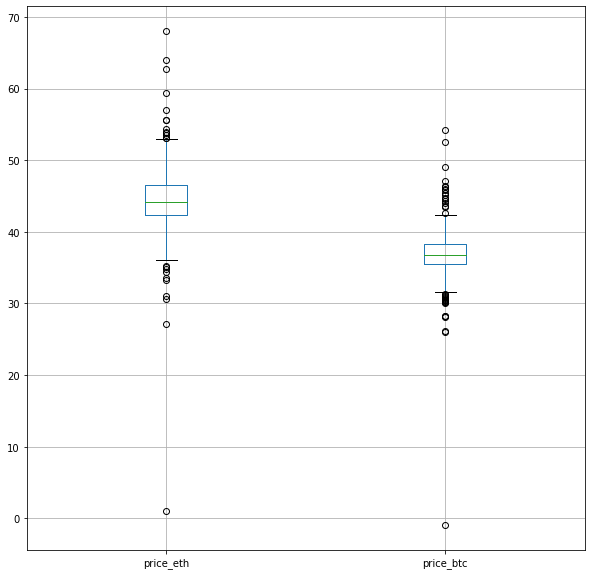

In [55]:
# Comparo ambos en un grafico.
df_prices_eth = pd.read_csv('Ether.csv')  
df_prices_eth['var_std_eth'] = ((( df_prices_eth['close'] - df_prices_eth['open'] ) / df_prices_eth['open']) * 100 ) + 43.87728497223347
df_prices_comparate = pd.DataFrame(columns=['price_eth', 'price_btc'])
df_prices_comparate ['price_eth'] = df_prices_eth['var_std_eth']
df_prices_comparate ['price_btc'] = df_prices['var_std']
ax = df_prices_comparate.boxplot(column = ['price_eth' , 'price_btc'])